<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.pipeline import  make_pipeline
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor

In [2]:
data_train = pd.read_csv('/datasets/gold_industry_train.csv')
data_test = pd.read_csv('/datasets/gold_industry_test.csv')
data_full = pd.read_csv('/datasets/gold_industry_full.csv')

In [146]:
def display_data_summary(data):
    # Вывод первых 5 строк данных
    display("Первые 5 строк данных:")
    display(data.head())
    display()
    # Вывод общей информации о данных
    display("Информация о данных:")
    data.info()
    display()
    # Вывод основной статистической информации о данных
    display("Основная статистическая информация:")
    display(data.describe())
    display("Количество дубликатов:")
    display(data.duplicated().sum())

In [147]:
display_data_summary(data_test)

'Первые 5 строк данных:'

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575,70.281454,89.514960
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,65.523246,89.858126
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155,74.817644,91.816623
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973,63.082720,88.478959
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805,74.463380,89.230316


'Информация о данных:'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4860 entries, 0 to 4859
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4860 non-null   float64
 4   rougher.input.feed_sol                      4860 non-null   float64
 5   rougher.input.feed_rate                     4860 non-null   float64
 6   rougher.input.feed_size                     4860 non-null   float64
 7   rougher.input.floatbank10_sulfate           4860 non-null   float64
 8   rougher.input.floatbank10_xanthate          4860 non-null   float64
 9   rougher.state.floatbank10_a_air             4860 non-null   float64
 10  rougher.stat

'Основная статистическая информация:'

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
count,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,...,4.860000e+03,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000
mean,8.005584,8.547348,3.561784,37.069792,490.309284,59.136150,12.057597,6.101661,1108.613929,-368.367214,...,1.556951e+01,-464.194020,16.592772,-490.814830,12.944947,-489.585724,19.052445,-504.698207,67.923574,85.750584
std,1.993590,1.958601,1.054072,4.951534,94.390944,19.512497,3.409122,1.042937,156.484531,91.166106,...,4.927123e+00,65.711575,5.724469,32.255136,5.533068,37.081098,5.549336,38.709553,8.414134,6.648023
min,0.010000,0.010000,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,...,2.489718e-17,-799.860767,-0.371498,-797.142475,1.358469,-800.006180,0.160386,-809.734800,5.586496,18.491446
25%,6.574363,6.975898,2.889751,34.499634,434.099695,47.610795,9.891306,5.499815,999.716280,-499.732114,...,1.202130e+01,-500.196647,11.073147,-500.483408,9.011798,-500.129853,14.963797,-500.670150,63.939233,82.354512
50%,7.812923,8.179714,3.534772,37.477270,502.118742,55.461058,11.997874,6.099860,1001.415225,-300.181407,...,1.501236e+01,-499.541765,16.630479,-499.872663,11.999357,-499.955378,19.959824,-500.033782,68.744713,86.839027
75%,9.556589,10.084339,4.193098,40.450375,555.642707,66.538910,14.496080,6.802227,1202.826771,-299.961632,...,1.999938e+01,-400.302337,19.983130,-498.852661,15.003970,-499.643878,24.974535,-499.460505,73.037434,90.145117
max,13.417156,14.533698,7.142594,53.477742,702.523396,363.989699,30.010759,9.396928,1521.980372,-281.039299,...,2.398898e+01,-114.250832,33.215996,-288.963521,24.177106,-141.934397,32.028529,-104.427459,100.000000,100.000000


'Количество дубликатов:'

0

In [5]:
display_data_summary(data_train)

'Первые 5 строк данных:'

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


'Информация о данных:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


None

'Основная статистическая информация:'

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,...,13659.000000,14579.000000,14578.000000,14578.000000,14387.000000,14579.000000,14579.000000,14578.000000,14504.000000,14574.000000
mean,8.352941,8.877460,3.604221,36.561420,474.332784,58.922712,12.427399,5.994854,1104.208278,-379.367166,...,7.111347,43.979499,5.192145,9.923809,9.566676,66.759066,3.087939,9.731972,2.719985,10.612745
std,1.934376,1.922536,1.056063,5.209823,108.503552,22.407410,3.428939,1.152873,162.235606,94.652311,...,3.909951,5.471437,1.388014,1.706976,2.805654,10.619709,0.915187,2.358143,0.958929,2.871075
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.049194,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.932996,7.341922,2.880490,34.093951,411.048483,47.278490,10.002832,5.304167,999.644856,-499.861797,...,3.784897,43.345906,4.283347,9.103183,7.860030,63.114596,2.505287,8.088928,2.036512,9.013412
50%,8.225284,8.715859,3.532399,37.097511,498.187968,54.361187,12.003320,6.003053,1000.982624,-300.314199,...,7.629968,44.975014,5.118647,10.046455,9.301970,67.962788,3.029238,9.818512,2.774847,10.670515
75%,9.832210,10.255843,4.257282,39.899799,549.586552,64.464926,14.929903,6.796632,1292.663971,-299.989315,...,10.367050,46.275153,5.925380,10.981203,11.001573,72.598187,3.614098,11.169187,3.353845,12.130827
max,13.731330,14.596026,7.052325,53.475325,717.508837,484.967466,36.118275,9.703448,1512.299531,-273.776101,...,26.000772,52.756638,16.001945,16.705297,19.423912,100.000000,8.245022,19.552149,5.804178,22.317730


'Количество дубликатов:'

0

In [6]:
display_data_summary(data_full)

'Первые 5 строк данных:'

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


'Информация о данных:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


None

'Основная статистическая информация:'

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,19439.000000,19439.000000,19339.000000,19340.000000,19428.000000,19294.000000,19405.000000,19431.000000,19438.000000,19438.000000,...,17691.000000,19439.000000,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000
mean,8.266097,8.794927,3.598085,36.695114,478.320042,58.970310,12.334373,6.021474,1105.315068,-376.610690,...,7.167247,44.076513,5.168470,9.978895,9.501224,67.050208,3.042467,9.688589,2.705795,10.583728
std,1.955092,1.936847,1.049486,5.145445,105.373758,21.634478,3.427317,1.127263,160.826798,93.909667,...,3.916079,5.129784,1.372348,1.669240,2.787537,10.125840,0.922808,2.328642,0.949077,2.868782
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.046369,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.854384,7.237967,2.887280,34.207799,416.525453,47.435103,10.000362,5.398678,999.661867,-499.835165,...,3.845475,43.402215,4.251240,9.137262,7.722820,63.299712,2.461138,8.062878,2.040119,8.938947
50%,8.125839,8.593574,3.534895,37.202650,499.416120,54.610197,12.001174,6.008273,1001.072890,-300.263994,...,7.685827,45.011244,5.066094,10.102433,9.218961,68.172738,2.984909,9.743623,2.748730,10.622456
75%,9.769917,10.213771,4.244161,40.039133,550.172183,65.023044,14.716595,6.798051,1205.620588,-299.981998,...,10.411296,46.275313,5.895527,11.035769,10.947813,72.686642,3.571351,11.134294,3.333216,12.104271
max,13.731330,14.596026,7.142594,53.477742,717.508837,484.967466,36.118275,9.703448,1521.980372,-273.776101,...,26.000772,52.756638,16.001945,17.031899,19.615720,100.000000,8.245022,19.552149,5.804178,22.317730


'Количество дубликатов:'

0

In [7]:
display(data_full.isna().sum())   

date                        0
rougher.input.feed_au       0
rougher.input.feed_ag       0
rougher.input.feed_pb     100
rougher.input.feed_sol     99
                         ... 
final.output.recovery       0
final.output.tail_au        0
final.output.tail_ag        1
final.output.tail_pb      101
final.output.tail_sol       6
Length: 87, dtype: int64

In [8]:
display(data_train.isna().sum())

date                       0
rougher.input.feed_au      0
rougher.input.feed_ag      0
rougher.input.feed_pb     72
rougher.input.feed_sol    77
                          ..
final.output.recovery      0
final.output.tail_au       0
final.output.tail_ag       1
final.output.tail_pb      75
final.output.tail_sol      5
Length: 87, dtype: int64

In [9]:
display(data_test.isna().sum())

date                                            0
rougher.input.feed_au                           0
rougher.input.feed_ag                           0
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
rougher.input.feed_rate                         4
rougher.input.feed_size                        44
rougher.input.floatbank10_sulfate               3
rougher.input.floatbank10_xanthate              1
rougher.state.floatbank10_a_air                 1
rougher.state.floatbank10_a_level               1
rougher.state.floatbank10_b_air                 1
rougher.state.floatbank10_b_level               1
rougher.state.floatbank10_c_air                 1
rougher.state.floatbank10_c_level               1
rougher.state.floatbank10_d_air                 0
rougher.state.floatbank10_d_level               0
rougher.state.floatbank10_e_air                 7
rougher.state.floatbank10_e_level               0
rougher.state.floatbank10_f_air                 0


Считаем recovery

In [10]:
def recovery_1(rougher_output, rougher_input, rougher_tail):
    recovery = (rougher_output * (rougher_input - rougher_tail)) \
    / (rougher_input * (rougher_output - rougher_tail)) * 100
    return recovery

In [11]:
#вычисляю эффективность обогащения на тестовой выборке для признака:
recovery = recovery_1(data_train['rougher.output.concentrate_au'],
                         data_train['rougher.input.feed_au'],
                         data_train['rougher.output.tail_au'])
recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14574    87.684717
14575    90.677361
14576    89.574376
14577    87.724007
14578    88.890579
Length: 14579, dtype: float64

In [12]:
MAE = mean_absolute_error(data_train['rougher.output.recovery'], recovery)
print('MAE между расчётами и значением =', MAE)

MAE между расчётами и значением = 9.83758577644259e-15


Значение MAE стремится к 0, значит расчеты совпадают с признаком rougher.output.recovery. Соответственно считаем что в дальнейшем данная формула верна для расчетов

In [13]:
#выделяем признаки, которых нет в выборке test
#к какому типу относятся признаки, которых нет в выборке test
attributes = set(data_train.columns) - set(data_test.columns)
data_train[attributes].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   rougher.output.concentrate_sol                      14561 non-null  float64
 1   secondary_cleaner.output.tail_sol                   13659 non-null  float64
 2   rougher.calculation.au_pb_ratio                     14579 non-null  float64
 3   primary_cleaner.output.concentrate_sol              14314 non-null  float64
 4   rougher.output.concentrate_ag                       14579 non-null  float64
 5   final.output.recovery                               14579 non-null  float64
 6   secondary_cleaner.output.tail_au                    14579 non-null  float64
 7   secondary_cleaner.output.tail_ag                    14578 non-null  float64
 8   final.output.tail_au                                14579 non-null  float64


In [14]:
# data_test = pd.concat([data_test, data_full[['date', 'final.output.recovery', 'rougher.output.recovery']]], axis=1, join='inner')
data_test = data_test.merge(data_full[['date','final.output.recovery', 'rougher.output.recovery']], on='date', how='left')
# data_test = data_test.join(data_full.loc[data_test.index][['date','final.output.recovery','rougher.output.recovery']])
data_test.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575,70.281454,89.514960
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,65.523246,89.858126
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155,74.817644,91.816623
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973,63.082720,88.478959
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805,74.463380,89.230316


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Верно!</font>

In [15]:
#заполняем оставшиеся пропуски ближайшеми значениями, так как в условиях сказано, что данные похожи
#data_train = data_train.fillna(method='bfill') 
#data_test = data_test.fillna(method='bfill')
#data_full = data_full.fillna(method='bfill')
data_train = data_train.fillna(method='ffill') 
data_test = data_test.fillna(method='ffill')
data_full = data_full.fillna(method='ffill')

In [16]:
display(data_full.isna().sum().sum())   

0

In [17]:
display(data_train.isna().sum().sum())  

0

In [18]:
display(data_test.isna().sum().sum())  

0

**Вывод**

Мы проанализировали 3 таблицы , посмотрели даннные.

Видим, что явных дубликатов нет, однако еcть некоторое количество пропусков в тестовой и тренировочной выборках, основное количество в таргет признаках.

Оставшиеся пропусках в признаках заполнил пропуски методом 'bfill'

## Анализ данных

Посмотрим как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

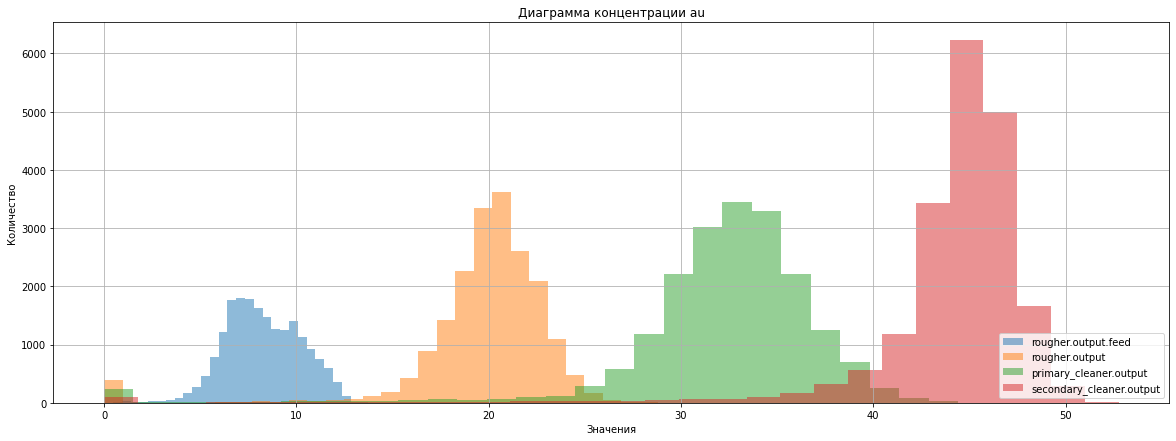

In [19]:
plt.figure(figsize=(20,7))
data_full['rougher.input.feed_au'].hist(bins=30, label='rougher.output.feed', alpha=0.5)
data_full['rougher.output.concentrate_au'].hist(bins=30, label='rougher.output', alpha=0.5)
data_full['primary_cleaner.output.concentrate_au'].hist(bins=30, label='primary_cleaner.output', alpha=0.5)
data_full['final.output.concentrate_au'].hist(bins=30, label='secondary_cleaner.output', alpha=0.5)
plt.title('Диаграмма концентрации au')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.legend(loc='lower right')
plt.show()

In [20]:
data_full[['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']].mean()

rougher.output.concentrate_au            19.772000
primary_cleaner.output.concentrate_au    32.119400
final.output.concentrate_au              44.076513
dtype: float64

In [21]:
data_full[['rougher.output.tail_au', 'primary_cleaner.output.tail_au', 'secondary_cleaner.output.tail_au']].mean()

rougher.output.tail_au              1.816391
primary_cleaner.output.tail_au      3.914179
secondary_cleaner.output.tail_au    4.339625
dtype: float64

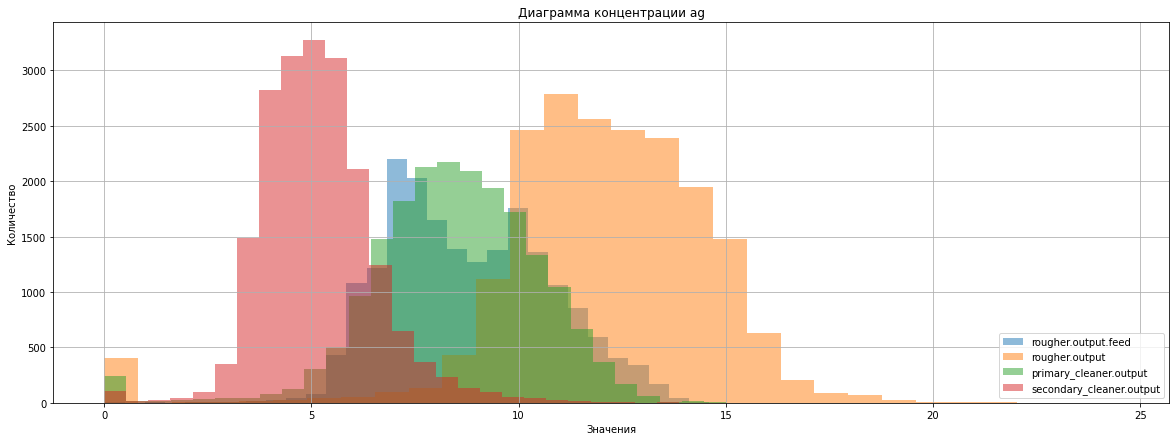

In [22]:
plt.figure(figsize=(20,7))
data_full['rougher.input.feed_ag'].hist(bins=30, label='rougher.output.feed', alpha=0.5)
data_full['rougher.output.concentrate_ag'].hist(bins=30, label='rougher.output', alpha=0.5)
data_full['primary_cleaner.output.concentrate_ag'].hist(bins=30, label='primary_cleaner.output', alpha=0.5)
data_full['final.output.concentrate_ag'].hist(bins=30, label='secondary_cleaner.output', alpha=0.5)
plt.title('Диаграмма концентрации ag')
plt.legend(loc='lower right')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.show()

In [23]:

data_full[['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']].mean()

rougher.output.concentrate_ag            11.994759
primary_cleaner.output.concentrate_ag     8.442408
final.output.concentrate_ag               5.168387
dtype: float64

In [24]:

data_full[['rougher.output.tail_ag', 'primary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_ag']].mean()

rougher.output.tail_ag               5.589064
primary_cleaner.output.tail_ag      16.145888
secondary_cleaner.output.tail_ag    14.586694
dtype: float64

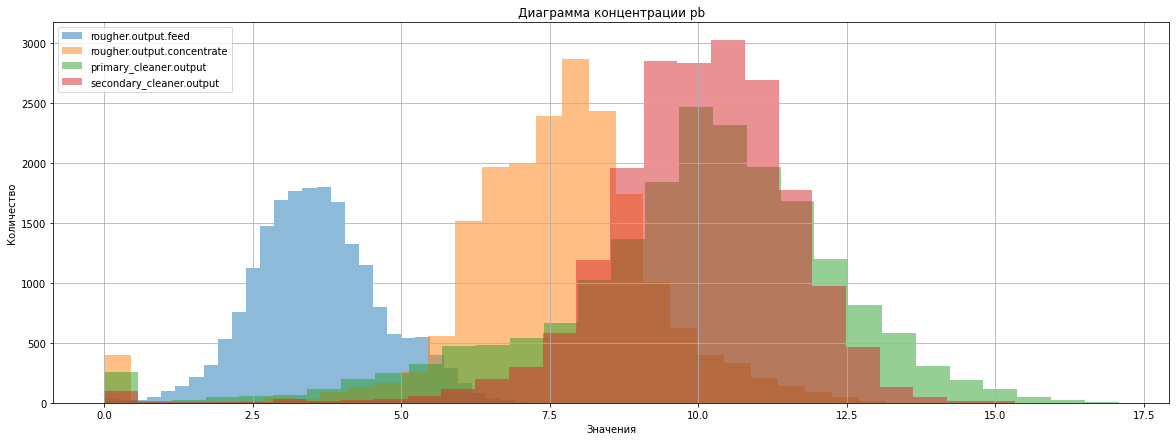

In [25]:
plt.figure(figsize=(20,7))

data_full['rougher.input.feed_pb'].hist(bins=30, label='rougher.output.feed', alpha=0.5)
data_full['rougher.output.concentrate_pb'].hist(bins=30, label='rougher.output.concentrate', alpha=0.5)
data_full['primary_cleaner.output.concentrate_pb'].hist(bins=30, label='primary_cleaner.output', alpha=0.5)
data_full['final.output.concentrate_pb'].hist(bins=30, label='secondary_cleaner.output', alpha=0.5)
plt.title('Диаграмма концентрации pb')

plt.legend(loc='upper left')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.show()

In [26]:
data_full[['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']].mean()

rougher.output.concentrate_pb            7.606272
primary_cleaner.output.concentrate_pb    9.809276
final.output.concentrate_pb              9.978821
dtype: float64

In [27]:
data_full[['rougher.output.tail_pb', 'primary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_pb']].mean()

rougher.output.tail_pb              0.645782
primary_cleaner.output.tail_pb      3.434147
secondary_cleaner.output.tail_pb    5.776537
dtype: float64

* Au: концентрация золота в породе с каждым этапом возрастает,т.к. часть пустой породы уходит в хвосты. Концентрация от флотации до готового продукта увеличивается более чем в 2,5 раза; в отвальных хвостах концентрации почти не меняется.
* Ag: концентрация серебра в породе с каждым этап падает, а в хвостах наоборот возрастает;
* Pb: концентрация свинца увеличивается с каждым этапом, аналогично в отвальных хвостах.

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках

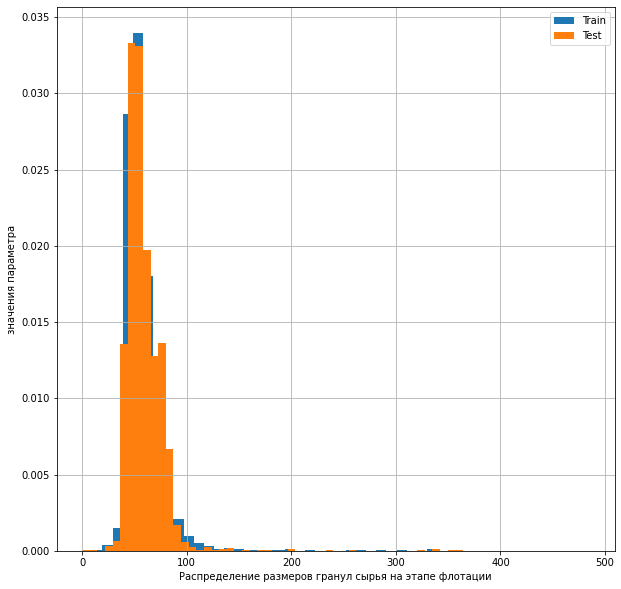

In [28]:
data_train['rougher.input.feed_size'].hist(bins=50,figsize=(10,10), density=True)
data_test['rougher.input.feed_size'].hist(bins=50, density=True)

plt.legend(['Train','Test'])
plt.xlabel('Распределение размеров гранул сырья на этапе флотации')
plt.ylabel('значения параметра')
plt.show()

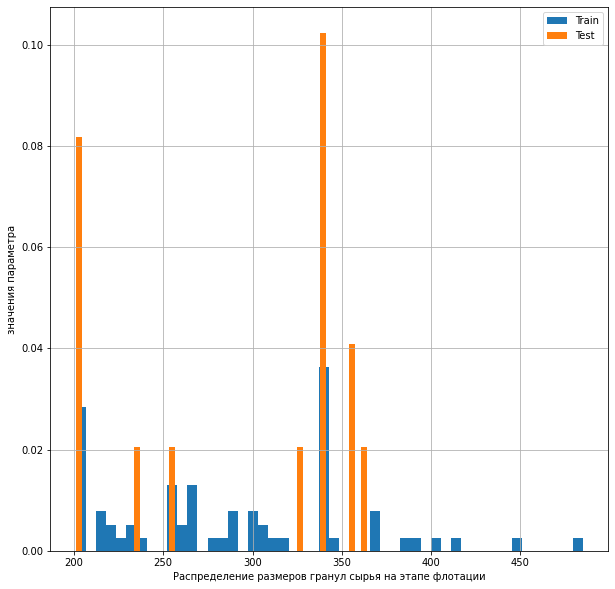

In [29]:
data_train[data_train['rougher.input.feed_size']>200]['rougher.input.feed_size'].hist(bins=50,figsize=(10,10), density=True)
data_test[data_test['rougher.input.feed_size']>200]['rougher.input.feed_size'].hist(bins=50, density=True)
                                                                                      
plt.legend(['Train','Test'])
plt.xlabel('Распределение размеров гранул сырья на этапе флотации')
plt.ylabel('значения параметра')
plt.show()

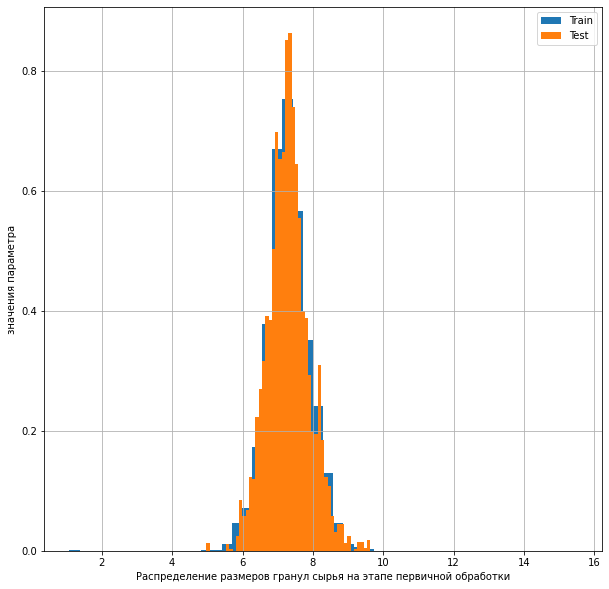

In [30]:
data_train['primary_cleaner.input.feed_size'].hist(bins=50,figsize=(10,10), density=True)
data_test['primary_cleaner.input.feed_size'].hist(bins=50, density=True)

plt.legend(['Train','Test'])
plt.xlabel('Распределение размеров гранул сырья на этапе первичной обработки')
plt.ylabel('значения параметра')
plt.show()

* Распределения для тестовой и тренировочной сравнительно похожи
* На первичной обработке диапазон размеров гранул сильно сужается по сравнению с флотацией, мода была в районе 50, упала в район 7 единиц.
* На этапе флотации на обоих выборках видны возможно выбросы на уровне больше 200  обоих выборках.

Суммарная концентрация всех веществ на разных стадиях

In [31]:
full_concentrate = pd.DataFrame()
full_concentrate['rougher.input'] = data_full['rougher.input.feed_ag'] \
+ data_full['rougher.input.feed_pb'] \
+ data_full['rougher.input.feed_sol'] \
+ data_full['rougher.input.feed_au']

full_concentrate['rougher.output'] = data_full['rougher.output.concentrate_ag'] \
+ data_full['rougher.output.concentrate_pb'] \
+ data_full['rougher.output.concentrate_sol'] \
+ data_full['rougher.output.concentrate_au']

full_concentrate['primary_cleaner.output'] = data_full['primary_cleaner.output.concentrate_ag'] \
+ data_full['primary_cleaner.output.concentrate_pb'] \
+ data_full['primary_cleaner.output.concentrate_sol'] \
+ data_full['primary_cleaner.output.concentrate_au']

full_concentrate['final.output'] = data_full['final.output.concentrate_ag'] \
+ data_full['final.output.concentrate_pb'] \
+ data_full['final.output.concentrate_sol'] \
+ data_full['final.output.concentrate_au']

full_concentrate.describe()

,rougher.input,rougher.output,primary_cleaner.output,final.output
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,57.322230,68.171375,60.758483,68.654112
std,7.209464,12.490476,10.023982,7.427434
min,0.040000,0.000000,0.000000,0.000000
25%,53.559598,66.012495,58.926955,67.932362
50%,57.594391,70.181495,62.500391,69.598444
75%,61.954409,74.356904,65.667353,71.368472
max,76.978947,88.140119,80.749343,80.210644


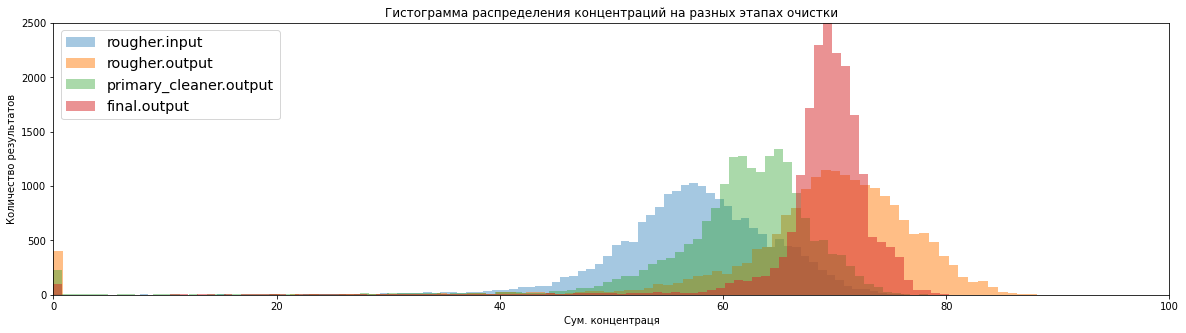

In [32]:
plt.figure(figsize=[20,5])

plt.hist(full_concentrate['rougher.input'], bins=100, label = 'rougher.input', alpha=0.4)
plt.hist(full_concentrate['rougher.output'], bins=100, label = 'rougher.output', alpha=0.5)
plt.hist(full_concentrate['primary_cleaner.output'], bins=100, label = 'primary_cleaner.output', alpha=0.4)
plt.hist(full_concentrate['final.output'], bins=100, label = 'final.output', alpha=0.5)

plt.xlim([0, 100])
plt.ylim([0, 2500])

plt.xlabel("Сум. концентраця")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентраций на разных этапах очистки")
plt.show()

Видим довольно много аномалий в нулевых значениях, нужно их обработать.

In [33]:
data_full = data_full.drop(index = data_full[data_full["rougher.input.feed_au"] < 1].index,
                               axis = 0)
data_full = data_full.drop(index = data_full[data_full["rougher.input.feed_ag"] < 1].index,
                               axis = 0)
data_full = data_full.drop(index = data_full[data_full["rougher.input.feed_pb"] < 1].index,
                               axis = 0)
data_full = data_full.drop(index = data_full[data_full["rougher.input.feed_sol"] < 1].index,
                               axis = 0)


data_full = data_full.drop(index = data_full[data_full["rougher.output.concentrate_au"] < 1].index,
                               axis = 0)
data_full = data_full.drop(index = data_full[data_full["rougher.output.concentrate_ag"] < 1].index,
                               axis = 0)
data_full = data_full.drop(index = data_full[data_full["rougher.output.concentrate_pb"] < 1].index,
                               axis = 0)
data_full = data_full.drop(index = data_full[data_full["rougher.output.concentrate_sol"] < 1].index,
                               axis = 0)

data_full = data_full.drop(index = data_full[data_full["primary_cleaner.output.concentrate_au"] < 1].index,
                               axis = 0)
data_full = data_full.drop(index = data_full[data_full["primary_cleaner.output.concentrate_ag"] < 1].index,
                               axis = 0)
data_full = data_full.drop(index = data_full[data_full["primary_cleaner.output.concentrate_pb"] < 1].index,
                               axis = 0)
data_full = data_full.drop(index = data_full[data_full["primary_cleaner.output.concentrate_sol"] < 1].index,
                               axis = 0)

data_full = data_full.drop(index = data_full[data_full["final.output.concentrate_au"] < 1].index,
                               axis = 0)
data_full = data_full.drop(index = data_full[data_full["final.output.concentrate_ag"] < 1].index,
                               axis = 0)
data_full = data_full.drop(index = data_full[data_full["final.output.concentrate_pb"] < 1].index,
                               axis = 0)
data_full = data_full.drop(index = data_full[data_full["final.output.concentrate_sol"] < 1].index,
                               axis = 0)

In [34]:
data_train = data_train.drop(index = data_train[data_train["rougher.input.feed_au"] < 1].index,
                               axis = 0)
data_train = data_train.drop(index = data_train[data_train["rougher.input.feed_ag"] < 1].index,
                               axis = 0)
data_train = data_train.drop(index = data_train[data_train["rougher.input.feed_pb"] < 1].index,
                               axis = 0)
data_train = data_train.drop(index = data_train[data_train["rougher.input.feed_sol"] < 1].index,
                               axis = 0)


data_train = data_train.drop(index = data_train[data_train["rougher.output.concentrate_au"] < 1].index,
                               axis = 0)
data_train = data_train.drop(index = data_train[data_train["rougher.output.concentrate_ag"] < 1].index,
                               axis = 0)
data_train = data_train.drop(index = data_train[data_train["rougher.output.concentrate_pb"] < 1].index,
                               axis = 0)
data_train = data_train.drop(index = data_train[data_train["rougher.output.concentrate_sol"] < 1].index,
                               axis = 0)

data_train = data_train.drop(index = data_train[data_train["primary_cleaner.output.concentrate_au"] < 1].index,
                               axis = 0)
data_train = data_train.drop(index = data_train[data_train["primary_cleaner.output.concentrate_ag"] < 1].index,
                               axis = 0)
data_train = data_train.drop(index = data_train[data_train["primary_cleaner.output.concentrate_pb"] < 1].index,
                               axis = 0)
data_train = data_train.drop(index = data_train[data_train["primary_cleaner.output.concentrate_sol"] < 1].index,
                               axis = 0)

data_train = data_train.drop(index = data_train[data_train["final.output.concentrate_au"] < 1].index,
                               axis = 0)
data_train = data_train.drop(index = data_train[data_train["final.output.concentrate_ag"] < 1].index,
                               axis = 0)
data_train = data_train.drop(index = data_train[data_train["final.output.concentrate_pb"] < 1].index,
                               axis = 0)
data_train = data_train.drop(index = data_train[data_train["final.output.concentrate_sol"] < 1].index,
                               axis = 0)

* Концентрация металлов (Au, Ag, Pb) на разных этапах очистки.
* Размер гранул сырья на обучающей и тестовой выборках
* Суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.
* Найдены и обработаны аномалии. Данные готовы к обучению.

## Модель

Напишем функцию для вычисления итоговой sMAPE

In [35]:
def sMAPE(y_true,y_pred):
    error = np.mean(abs(y_true - y_pred)/((abs(y_true)+abs(y_pred))/2))*100
    return error

In [36]:
def final_sMAPE(sMAPE_rougher,sMAPE_final):
    return (0.25*sMAPE_rougher + 0.75*sMAPE_final)

In [37]:
#features_columns = data_test.columns[1:] # Оставим все столбцы кроме data
#rougher_features_columns = set(features_columns[12:34]) # Для предсказания rougher.output.recovery используем данные из стобцов rougher
#final_features_columns = set(features_columns) # Тут будем использовать все столбцы из тестовой выборки
#print(final_features_columns)

In [38]:
#columns_to_delete = set(data_test.columns) - final_features_columns
#train_features_dataset_final = data_train.drop(columns_to_delete, axis=1)
#train_features_dataset_final = data_train.drop('date', axis=1)
# Подготовка признаков для rougher.output.recovery
#columns_to_delete = set(train_features_dataset_final.columns) - rougher_features_columns
#train_features_dataset_rougher = train_features_dataset_final.drop(columns_to_delete, axis=1)

In [42]:
features_train = data_train.drop(['date','rougher.output.recovery', 'final.output.recovery',
                                     'rougher.output.concentrate_au', 'primary_cleaner.output.tail_pb',
                                      'final.output.concentrate_au', 'primary_cleaner.output.concentrate_pb',
                                      'final.output.tail_sol',
                                      'rougher.calculation.floatbank10_sulfate_to_au_feed',
                                      'rougher.output.tail_sol', 'final.output.tail_au',
                                      'primary_cleaner.output.concentrate_ag',
                                      'rougher.calculation.floatbank11_sulfate_to_au_feed',
                                      'rougher.output.tail_ag', 'rougher.output.tail_pb',
                                      'secondary_cleaner.output.tail_pb', 'final.output.tail_ag',
                                      'final.output.concentrate_sol', 'primary_cleaner.output.tail_au',
                                      'secondary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_ag',
                                      'rougher.output.tail_au', 'rougher.output.concentrate_ag',
                                      'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_pb',
                                      'final.output.concentrate_ag', 'secondary_cleaner.output.tail_au',
                                      'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
                                      'primary_cleaner.output.tail_sol',
                                      'rougher.calculation.sulfate_to_au_concentrate',
                                      'final.output.tail_pb', 'primary_cleaner.output.concentrate_au',
                                      'primary_cleaner.output.tail_ag', 'rougher.calculation.au_pb_ratio'], 
                                     axis=1).values  #кроме целевых, убираю признаки, которых нет в test:

target_train_rougher = data_train['rougher.output.recovery'].values
target_train_final = data_train['final.output.recovery'].values

for sample in [features_train, target_train_rougher, target_train_final]:
    print(sample.shape)

(13613, 52)
(13613,)
(13613,)


In [43]:
print(data_test.shape)

(4860, 55)


In [48]:
custom_score = make_scorer(sMAPE,greater_is_better=False)

In [49]:
model = make_pipeline(StandardScaler(),RandomForestRegressor())
model2 = make_pipeline(StandardScaler(),DecisionTreeRegressor())
model3 = make_pipeline(StandardScaler(), LinearRegression())

In [50]:
params_RF = {"randomforestregressor__n_estimators":[1,100],
             "randomforestregressor__max_depth":[1,10],
            'randomforestregressor__random_state':[12345]}
params_DT= {"decisiontreeregressor__max_depth":[1,10]}
parameters_LR = {'linearregression__normalize':[False]}

In [51]:
from sklearn.model_selection import GridSearchCV
grid_rougher = GridSearchCV(model, param_grid = params_RF, cv=5, scoring=custom_score)
grid_final = GridSearchCV(model, param_grid = params_RF, cv=5, scoring=custom_score)
grid_rougher_DT = GridSearchCV(model2, param_grid = params_DT, cv=5, scoring=custom_score)
grid_final_DT = GridSearchCV(model2, param_grid = params_DT, cv=5, scoring=custom_score)
grid_rougher_LR = GridSearchCV(model3, param_grid=parameters_LR, scoring=custom_score)
grid_final_LR = GridSearchCV(model3, param_grid=parameters_LR, scoring=custom_score)

In [52]:
grid_rougher.fit(features_train, target_train_rougher)
grid_final.fit(features_train, target_train_final)
grid_rougher_DT.fit(features_train, target_train_rougher)
grid_final_DT.fit(features_train, target_train_final)
grid_rougher_LR.fit(features_train, target_train_rougher)
grid_final_LR.fit(features_train, target_train_final)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__normalize': [False]},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [53]:
display("Лучшие модели")
display(grid_rougher.best_estimator_)
display(grid_final.best_estimator_)
display(grid_rougher_DT.best_estimator_)
display(grid_final_DT.best_estimator_)
display(grid_rougher_LR.best_estimator_)
display(grid_final_LR.best_estimator_)

'Лучшие модели'

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=10, random_state=12345))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=1, random_state=12345))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=1))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=1))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [54]:
best_score_rougher = grid_rougher.best_score_
best_score_final = grid_final.best_score_
best_score_rougher_DT = grid_rougher_DT.best_score_
best_score_final_DT = grid_final_DT.best_score_
best_score_rougher_LR = grid_rougher_LR.best_score_
best_score_final_LR = grid_final_LR.best_score_

display('по модели RandomForestRegressor лучший результат rougher =', best_score_rougher)
display('по модели DecisionTreeRegressor лучший результат rougher =', best_score_rougher_DT)
display('по модели LinearRegression лучший результат rougher =', best_score_rougher_LR)
display()
display('по модели RandomForestRegressor лучший результат final =', best_score_final)
display('по модели DecisionTreeRegressor лучший результат final =', best_score_final_DT)
display('по модели LinearRegression лучший результат final =', best_score_final_LR)

'по модели RandomForestRegressor лучший результат rougher ='

-6.808154009846916

'по модели DecisionTreeRegressor лучший результат rougher ='

-7.160965334754314

'по модели LinearRegression лучший результат rougher ='

-7.005146464308488

'по модели RandomForestRegressor лучший результат final ='

-8.74547252381542

'по модели DecisionTreeRegressor лучший результат final ='

-8.80472729912603

'по модели LinearRegression лучший результат final ='

-9.285261832443027

In [55]:
#вычисляю final sMAPE для каждой модели:
final_smape = final_sMAPE(best_score_rougher, best_score_final)
display('по модели RandomForestRegressor итоговое sMAPE =', final_smape)

final_smape_DT = final_sMAPE(best_score_rougher_DT, best_score_final_DT)
display('по модели DecisionTreeRegressor итоговое sMAPE =', final_smape_DT)

final_smape_LR = final_sMAPE(best_score_rougher_LR, best_score_final_LR)
display('по модели LinearRegression итоговое sMAPE =', final_smape_LR)

'по модели RandomForestRegressor итоговое sMAPE ='

-8.261142895323294

'по модели DecisionTreeRegressor итоговое sMAPE ='

-8.393786808033102

'по модели LinearRegression итоговое sMAPE ='

-8.715232990409392

Исходя из данных , мы видим что лучше спарвляется RandomForestRegressor

In [125]:
#features_test = data_test.merge(data_full[['date', 'rougher.output.recovery','final.output.recovery']], on='date', how='left')
features_test= data_test.drop(['date', 'rougher.output.recovery','final.output.recovery'], axis = 1).values

In [149]:
#features_test= data_full['date'].values
# data_test['rougher.output.recovery'].values
target_test_rougher =  data_test['rougher.output.recovery'].values
target_test_final = data_test['final.output.recovery'].values
test_rougher = grid_rougher.predict(features_test) 
test_final = grid_final.predict(features_test)
rouger_smape_test = sMAPE(target_test_rougher, test_rougher)
final_smape_test = sMAPE(target_test_final, test_final)
final_smape = final_sMAPE(rouger_smape_test, final_smape_test)
print('Симметричная средняя абсолютная процентная ошибка на тестовой выборке =', round(final_smape,3))

Симметричная средняя абсолютная процентная ошибка на тестовой выборке = 7.359


Проверка модели на адекватность

In [145]:
for strategy in ['mean', 'median']:
    dummy_rougher = DummyRegressor(strategy=strategy)
    dummy_final = DummyRegressor(strategy=strategy)    
    dummy_rougher.fit(features_train, target_train_rougher)
    dummy_final.fit(features_train, target_train_final)
    rougher = dummy_rougher.predict(data_test)
    final = dummy_final.predict(data_test)    
    final_smape = final_sMAPE(sMAPE(target_test_rougher, rougher), sMAPE(target_test_final, final))
    print('Для стратегии', strategy, 'итоговая sMAPE =', round(final_smape,3))

Для стратегии mean итоговая sMAPE = 8.425
Для стратегии median итоговая sMAPE = 8.285


**ВЫВОД**

В ходе предобработки данных проекта были изучены загруженные файлы и построены графики распределения значений по числовым полям.
Большинство признаков имеют нормальное распределение, но также есть и скошенные распределения, а некоторые признаки содержат значительное количество нулевых значений, которые были удалены как выбросы.
Был выполнен расчет эффективности обогащения и вычислено значение MAE между данными и расчетными значениями эффективности. Полученные значения МАЕ близки к 0, что свидетельствует о правильном расчете эффективности обогащения.
Проанализированы поля, которые недоступны в тестовой выборке и не содержат целевых признаков для моделей 'rougher.output.recovery' и 'final.output.recovery'.


Анализ концентрации металлов показал, что концентрация золота значительно увеличивается на каждом этапе обработки сырья, включая отвалы, но в отвалах концентрация золота ниже чем в сырье. На графиках концентрации сырья видны значения равные нулю, которые являются выбросами.
Были построены графики распределения плотности вероятности значений размеров гранул на входе в этапы флотации и финальной очистки для выборок train и test. 
Распределения данных размеров сырья в выборках train и test оказались похожими, что говорит об однородности данных.
Была исследована суммарная концентрация всех веществ на разных стадиях обработки: в сырье, в черновом и финальном концентратах. 
Были подготовлены датафреймы для прогнозирования признаков и целевых значений, а также описана функция для вычисления итогового sMAPE.

На данных train были обучены модели линейной регрессии, дерева решений и случайного леса, и проведена оценка каждой модели. 
В итоге для прогнозирования была выбрана модель случайного леса.
Лучшие параметры позволяют достичь показателя smape равного 8.26 на данных train.
Используя выбранную модель случайного леса, был выполнен итоговый расчет на тестовых данных, который позволил получить прогноз целевых признаков концентрации золота для этапа флотации и финальной очистки с показателем smape равным  7.359
Была проведена проверка модели на адекватность, и итоговая оценка smape константной модели на тестовых данных для стратегии mean 8.425 и для median: 8.285, соответсвенно.

## Чек-лист готовности проекта


- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке